In [1725]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [1726]:
df=pd.read_excel("Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [1727]:
df.shape

(10799, 11)

In [1728]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10799 entries, 0 to 10798
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Date_of_Journey  10683 non-null  object 
 2   Source           10683 non-null  object 
 3   Destination      10683 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10683 non-null  object 
 6   Arrival_Time     10683 non-null  object 
 7   Duration         10683 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10683 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 928.2+ KB


In [1729]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [1730]:
df.isnull().sum()

,0
Airline,116
Date_of_Journey,116
Source,116
Destination,116
Route,117
Dep_Time,116
Arrival_Time,116
Duration,116
Total_Stops,117
Additional_Info,116


In [1731]:
#  if we want to remove all the null value(missing value) present in dataframe

# df.dropna(inplace=True)

In [1732]:
df.shape

(10799, 11)

In [1733]:
df.duplicated().sum()

np.int64(335)

In [1734]:
df.drop_duplicates(inplace=True)

In [1735]:
df.shape

(10464, 11)

In [1736]:
df['Airline'].value_counts()

,count
Airline,
Jet Airways,3700
IndiGo,2043
Air India,1695
Multiple carriers,1196
SpiceJet,815
Vistara,478
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


In [1737]:
list(df.columns)

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price']

In [1738]:
df['Additional_Info']

,Additional_Info
0,No info
1,No info
2,No info
3,No info
4,No info
...,...
10753,No info
10754,No info
10755,No info
10756,No info


In [1739]:
df.drop(columns=['Additional_Info'],inplace=True)

In [1740]:
df.shape

(10464, 10)

In [1741]:
#  if we don't want to remove the null value insted of remove the null value here we are impute that null value

In [1742]:
df.apply(lambda col:col.isnull().sum())


,0
Airline,1
Date_of_Journey,1
Source,1
Destination,1
Route,2
Dep_Time,1
Arrival_Time,1
Duration,1
Total_Stops,2
Price,1


In [1743]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad',
       nan], dtype=object)

In [1744]:
destination = []
for i in df['Destination']:
    if i == 'New Delhi':
        destination.append(i.replace('New Delhi', 'Delhi'))
    else:
        destination.append(i)

# Assign the updated list back to the DataFrame
df['Destination'] = destination


In [1745]:
df.drop(columns=['Destination'],inplace=True)

In [1746]:
df['Destination']=pd.Series(destination)

In [1747]:
df.head()

,Airline,Date_of_Journey,Source,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Destination
0,IndiGo,24/03/2019,Banglore,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897.0,Delhi
1,Air India,1/05/2019,Kolkata,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662.0,Banglore
2,Jet Airways,9/06/2019,Delhi,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882.0,Cochin
3,IndiGo,12/05/2019,Kolkata,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218.0,Banglore
4,IndiGo,01/03/2019,Banglore,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302.0,Delhi


 we can see that Date_of_Journey is a object data type
Therefore, we have to convert this datatype into timestamp so that we can use that column properly to find the insights.

For this we require pandas to_datetime to convert object data type to datetime dtype.

In [1748]:
date_col=['Date_of_Journey','Dep_Time','Arrival_Time']
df[date_col]



,Date_of_Journey,Dep_Time,Arrival_Time
0,24/03/2019,22:20,01:10 22 Mar
1,1/05/2019,05:50,13:15
2,9/06/2019,09:25,04:25 10 Jun
3,12/05/2019,18:05,23:30
4,01/03/2019,16:50,21:35
...,...,...,...
10753,9/04/2019,19:55,22:25
10754,27/04/2019,20:45,23:20
10755,27/04/2019,08:20,11:20
10756,01/03/2019,11:30,14:10


In [1749]:
df[date_col] = df[date_col].applymap(lambda x: pd.to_datetime(x, errors='coerce'))

In [1750]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10464 entries, 0 to 10757
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10463 non-null  object        
 1   Date_of_Journey  10463 non-null  datetime64[ns]
 2   Source           10463 non-null  object        
 3   Route            10462 non-null  object        
 4   Dep_Time         10463 non-null  datetime64[ns]
 5   Arrival_Time     10463 non-null  datetime64[ns]
 6   Duration         10463 non-null  object        
 7   Total_Stops      10462 non-null  object        
 8   Price            10463 non-null  float64       
 9   Destination      10204 non-null  object        
dtypes: datetime64[ns](3), float64(1), object(6)
memory usage: 1.1+ MB


In [1751]:
df[date_col] = df[date_col].fillna(method='ffill')


In [1752]:
non_numerical_cols = df.select_dtypes(include=['object'])

In [1753]:
non_numerical_cols.apply(lambda col:col.mode()[0],axis=0)

,0
Airline,Jet Airways
Source,Delhi
Route,DEL → BOM → COK
Duration,2h 50m
Total_Stops,1 stop
Destination,Cochin


In [1754]:
df = df.apply(
    lambda col: col.fillna(col.mode()[0]) if col.dtype == 'object' else col,  # Fill NaN only for object columns
    axis=0
)

In [1755]:
df = df.apply(
    lambda col: col.fillna(col.mean()) if col.dtype == 'float64' else col,
    axis=0
)


In [1756]:
df.isnull().sum()


,0
Airline,0
Date_of_Journey,0
Source,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Price,0
Destination,0


In [1757]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Route', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Price', 'Destination'],
      dtype='object')

In [1758]:
print('Mean of Price:',np.mean(df.Price))
print('Median of Price:',np.median(df.Price))


Mean of Price: 9026.642454362993
Median of Price: 8266.0


<Axes: ylabel='Price'>

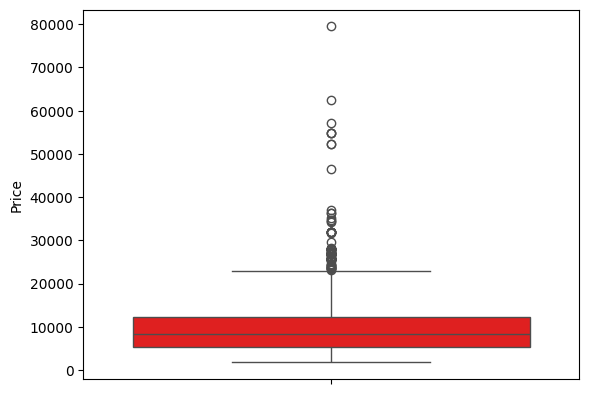

In [1759]:
sns.boxplot(df.Price,color='r')

We can see that Total_Stops is a Categorical column we can replace that column data into categories

In [1760]:
stop=df['Total_Stops'].unique().tolist()
stop

['non-stop', '2 stops', '1 stop', '3 stops', '4 stops']

In [1761]:
df.replace({"non-stop": 0 , "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [1762]:
df.head()

,Airline,Date_of_Journey,Source,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Destination
0,IndiGo,2019-03-24,Banglore,BLR → DEL,2025-06-20 22:20:00,2025-03-22 01:10:00,2h 50m,0,3897.0,Delhi
1,Air India,2019-01-05,Kolkata,CCU → IXR → BBI → BLR,2025-06-20 05:50:00,2025-06-20 13:15:00,7h 25m,2,7662.0,Banglore
2,Jet Airways,2019-09-06,Delhi,DEL → LKO → BOM → COK,2025-06-20 09:25:00,2025-06-10 04:25:00,19h,2,13882.0,Cochin
3,IndiGo,2019-12-05,Kolkata,CCU → NAG → BLR,2025-06-20 18:05:00,2025-06-20 23:30:00,5h 25m,1,6218.0,Banglore
4,IndiGo,2019-01-03,Banglore,BLR → NAG → DEL,2025-06-20 16:50:00,2025-06-20 21:35:00,4h 45m,1,13302.0,Delhi


# 1st Insights: How many Flights with respect to their Stopages ?

Total_Stops
1    5627
0    3475
2    1318
3      43
4       1
Name: count, dtype: int64
5627 flights have 1 stop
3475 flights have 0 stops
1318 flights have 2 stops
43 flights have 3 stops
1 flights have 4 stops


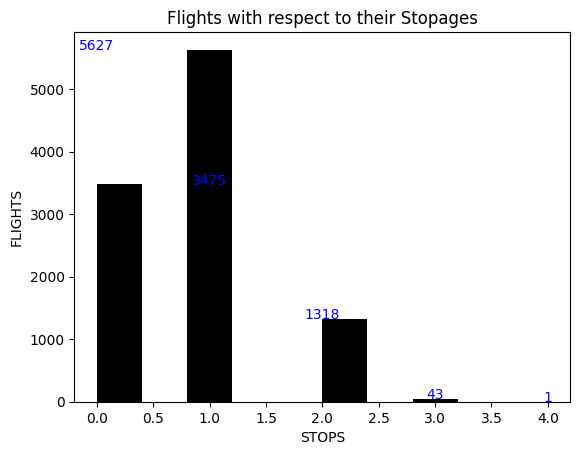

In [1763]:
counts = df['Total_Stops'].value_counts()
print(counts)
for stop, count in counts.items():
    stop_label = f"{stop} stop{'s' if stop > 1 or stop == 0 else ''}"
    print(f"{count} flights have {stop_label}")
categories = counts.index
values = counts.values
for i, value in enumerate(values):
    plt.text(i, value + 0.2, str(value), ha='center', fontsize=10, color='b')
plt.title('Flights with respect to their Stopages')
plt.hist(x='Total_Stops',data=df,color='k')
plt.ylabel('FLIGHTS')
plt.xlabel('STOPS')
plt.show()

# 2nd Insights: What flight is Expensive and Cheaper

In [1764]:
df.groupby(['Airline'])['Price'].max().sort_values(ascending=False)

,Price
Airline,
Jet Airways Business,79512.0
Jet Airways,54826.0
Multiple carriers,36983.0
Air India,31945.0
SpiceJet,23267.0
GoAir,22794.0
IndiGo,22153.0
Vistara,21730.0
Multiple carriers Premium economy,14629.0


Jet Airways Business is most expensive flight and Trujet is cheaper one

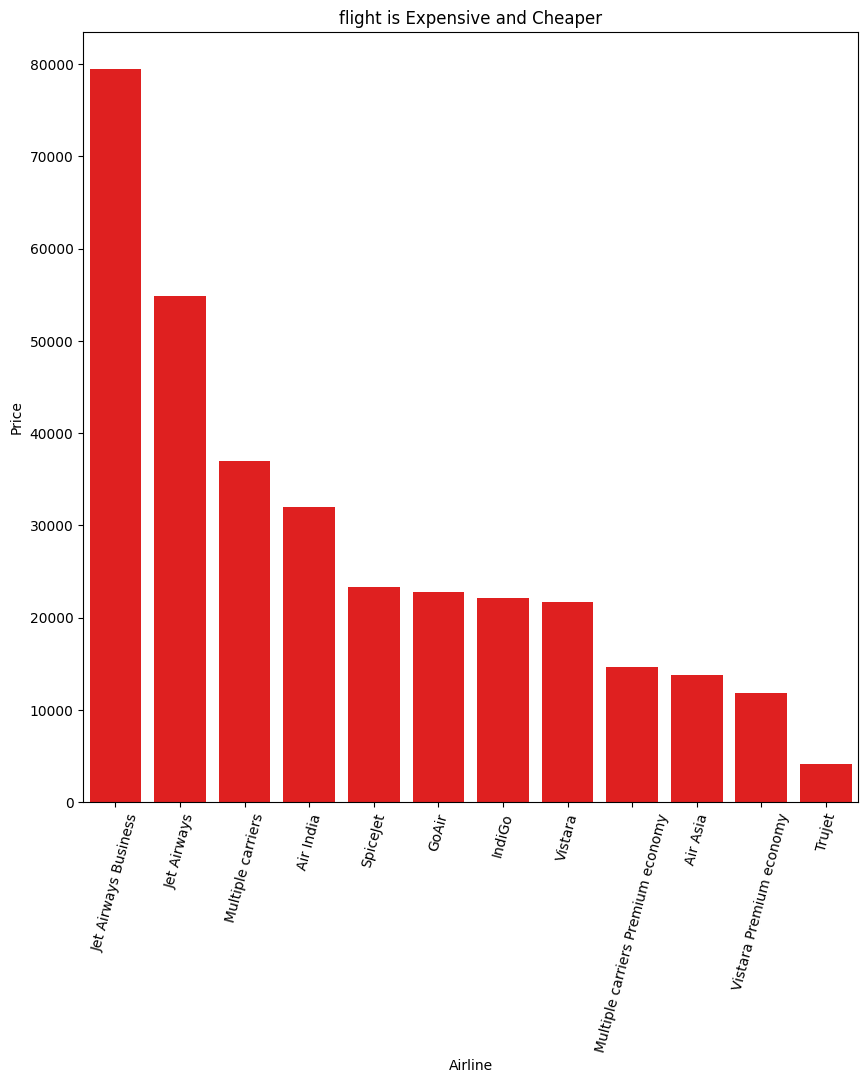

In [1765]:

plt.figure(figsize=(10,10))
plt.title('flight is Expensive and Cheaper')
sns.barplot(x=df.groupby(['Airline'])['Price'].max().sort_values(ascending=False).index,y=df.groupby(['Airline'])['Price'].max().sort_values(ascending=False),color='r')
plt.xticks(rotation=75)
plt.show()

In [1766]:
jet=df[df['Airline']=='Jet Airways Business']
print(jet)

max_price_row=jet[jet['Price']==jet['Price'].max()]
print(100*'=')
print('max_price:\n',max_price_row)
print(100*'=')
max_airline = max_price_row['Airline'].values[0]
max_source = max_price_row['Source'].values[0]
max_destination = max_price_row['Destination'].values[0]

# Display the result
print(f"Maximum price airline: {max_airline}")
print(f"Source of maximum price airline: {max_source}")
print(f"The Destination of the airline with the maximum price is: {max_destination}")


                    Airline Date_of_Journey    Source                  Route  \
657    Jet Airways Business      2019-01-03  Banglore        BLR → BOM → DEL   
2924   Jet Airways Business      2019-01-03  Banglore        BLR → BOM → DEL   
5372   Jet Airways Business      2019-01-03  Banglore        BLR → BOM → DEL   
7351   Jet Airways Business      2019-03-03     Delhi  DEL → ATQ → BOM → COK   
9715   Jet Airways Business      2019-06-03     Delhi  DEL → ATQ → BOM → COK   
10418  Jet Airways Business      2019-01-03  Banglore        BLR → MAA → DEL   

                 Dep_Time        Arrival_Time Duration  Total_Stops    Price  \
657   2025-06-20 05:45:00 2025-06-20 10:45:00       5h            1  52229.0   
2924  2025-06-20 05:45:00 2025-06-20 11:25:00   5h 40m            1  79512.0   
5372  2025-06-20 05:45:00 2025-06-20 12:25:00   6h 40m            1  62427.0   
7351  2025-06-20 20:05:00 2025-03-04 04:25:00   8h 20m            2  46490.0   
9715  2025-06-20 20:05:00 2025-03-07 04

In [1767]:
jet=df[df['Airline']=='Trujet']
print(jet)

min_price_row=jet[jet['Price']==jet['Price'].min()]
print(100*'=')
print('min_price:\n',min_price_row)
print(100*'=')
min_airline = min_price_row['Airline'].values[0]
min_source = min_price_row['Source'].values[0]
min_destination = min_price_row['Destination'].values[0]

# Display the result
print(f"minimum price airline: {min_airline}")
print(f"Source of minimum price airline: {min_source}")
print(f"The Destination of the airline with the minimum price is: {min_destination}")


     Airline Date_of_Journey  Source            Route            Dep_Time  \
2878  Trujet      2019-06-03  Mumbai  BOM → NDC → HYD 2025-06-20 13:05:00   

            Arrival_Time Duration  Total_Stops   Price Destination  
2878 2025-06-20 16:20:00   3h 15m            1  4140.0   Hyderabad  
min_price:
      Airline Date_of_Journey  Source            Route            Dep_Time  \
2878  Trujet      2019-06-03  Mumbai  BOM → NDC → HYD 2025-06-20 13:05:00   

            Arrival_Time Duration  Total_Stops   Price Destination  
2878 2025-06-20 16:20:00   3h 15m            1  4140.0   Hyderabad  
minimum price airline: Trujet
Source of minimum price airline: Mumbai
The Destination of the airline with the minimum price is: Hyderabad



# 3rd Insights: Variation of Flight Price from Source

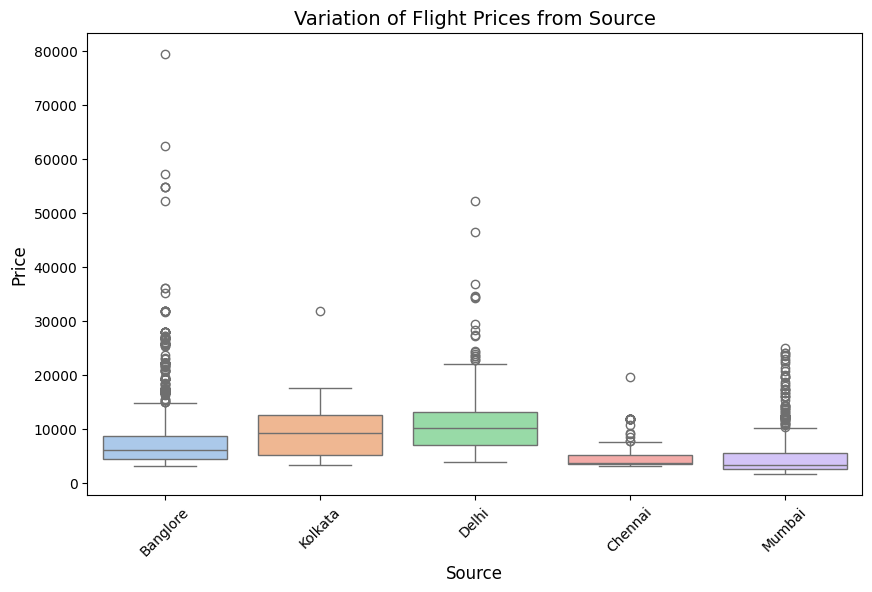

             min      max          mean   median
Source                                          
Banglore  3257.0  79512.0   8022.872877   6121.0
Chennai   3145.0  19630.0   4789.892388   3850.0
Delhi     3876.0  52285.0  10460.584689  10262.0
Kolkata   3480.0  31945.0   9143.083566   9345.0
Mumbai    1759.0  25139.0   5059.708752   3342.0


In [1768]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='Price', data=df, palette='pastel')
plt.title('Variation of Flight Prices from Source', fontsize=14)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.show()
#  Aggregated Statistics
price_stats = df.groupby('Source')['Price'].agg(['min', 'max', 'mean', 'median'])
print(price_stats)

# Extracting Journey Day and Month

In [1769]:
df['Month_of_Journey'] = df['Date_of_Journey'].dt.month
df['Day_of_Journey'] = df['Date_of_Journey'].dt.day

In [1770]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
df.drop(columns=['Date_of_Journey'], inplace=True)

In [1771]:
df.head()

,Airline,Source,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Destination,Month_of_Journey,Day_of_Journey
0,IndiGo,Banglore,BLR → DEL,2025-06-20 22:20:00,2025-03-22 01:10:00,2h 50m,0,3897.0,Delhi,3,24
1,Air India,Kolkata,CCU → IXR → BBI → BLR,2025-06-20 05:50:00,2025-06-20 13:15:00,7h 25m,2,7662.0,Banglore,1,5
2,Jet Airways,Delhi,DEL → LKO → BOM → COK,2025-06-20 09:25:00,2025-06-10 04:25:00,19h,2,13882.0,Cochin,9,6
3,IndiGo,Kolkata,CCU → NAG → BLR,2025-06-20 18:05:00,2025-06-20 23:30:00,5h 25m,1,6218.0,Banglore,12,5
4,IndiGo,Banglore,BLR → NAG → DEL,2025-06-20 16:50:00,2025-06-20 21:35:00,4h 45m,1,13302.0,Delhi,1,3


In [1772]:

# Departure time is when a plane leaves the gate.

# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [1773]:

# Arrival time is when the plane pulls up to the gate.

# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [1774]:
df.head()

,Airline,Source,Route,Duration,Total_Stops,Price,Destination,Month_of_Journey,Day_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,BLR → DEL,2h 50m,0,3897.0,Delhi,3,24,22,20,1,10
1,Air India,Kolkata,CCU → IXR → BBI → BLR,7h 25m,2,7662.0,Banglore,1,5,5,50,13,15
2,Jet Airways,Delhi,DEL → LKO → BOM → COK,19h,2,13882.0,Cochin,9,6,9,25,4,25
3,IndiGo,Kolkata,CCU → NAG → BLR,5h 25m,1,6218.0,Banglore,12,5,18,5,23,30
4,IndiGo,Banglore,BLR → NAG → DEL,4h 45m,1,13302.0,Delhi,1,3,16,50,21,35


# 4th Insights: On What Day and Month Have Flight Maximum Stopages

In [1775]:
day_with_max_stops=df.groupby('Day_of_Journey')['Total_Stops'].sum().idxmax()
month_with_max_stops=df.groupby('Month_of_Journey')['Total_Stops'].sum().idxmax()

print(f"The day with maximum stopages is: {day_with_max_stops}")
print(f"The month with maximum stopages is: {month_with_max_stops}")

The day with maximum stopages is: 6
The month with maximum stopages is: 6


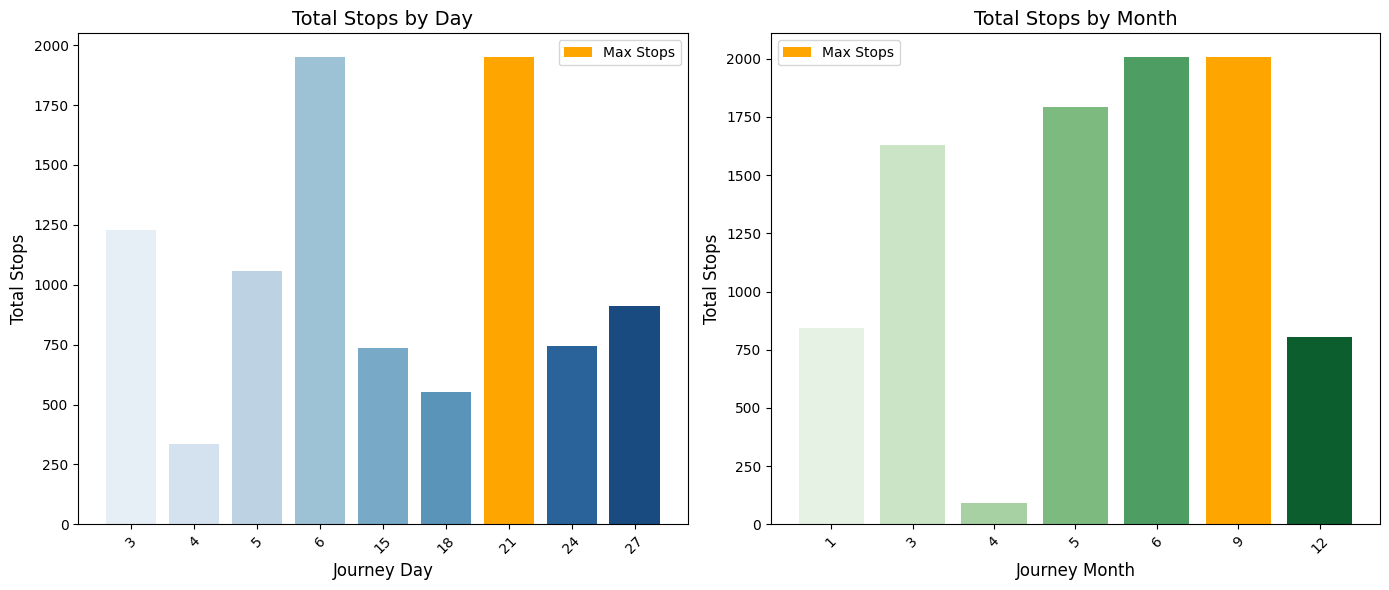

In [1776]:
day_stops = df.groupby('Day_of_Journey')['Total_Stops'].sum()
month_stops = df.groupby('Month_of_Journey')['Total_Stops'].sum()

# Step 4: Visualization for day with maximum stopages
plt.figure(figsize=(14, 6))

# Subplot 1: Stops by Day
plt.subplot(1, 2, 1)
sns.barplot(x=day_stops.index, y=day_stops.values, palette='Blues')
plt.title('Total Stops by Day', fontsize=14)
plt.xlabel('Journey Day', fontsize=12)
plt.ylabel('Total Stops', fontsize=12)
plt.xticks(rotation=45)

# Highlight maximum day
day_with_max_stops = day_stops.idxmax()
plt.bar(day_with_max_stops, day_stops.max(), color='orange', label='Max Stops')
plt.legend()

# Subplot 2: Stops by Month
plt.subplot(1, 2, 2)
sns.barplot(x=month_stops.index, y=month_stops.values, palette='Greens')
plt.title('Total Stops by Month', fontsize=14)
plt.xlabel('Journey Month', fontsize=12)
plt.ylabel('Total Stops', fontsize=12)
plt.xticks(rotation=45)

# Highlight maximum month
month_with_max_stops = month_stops.idxmax()
plt.bar(month_with_max_stops - 1, month_stops.max(), color='orange', label='Max Stops')
plt.legend()

plt.tight_layout()
plt.show()

In [1777]:
df['Month_of_Journey'].unique()

array([ 3,  1,  9, 12,  6,  5,  4], dtype=int32)

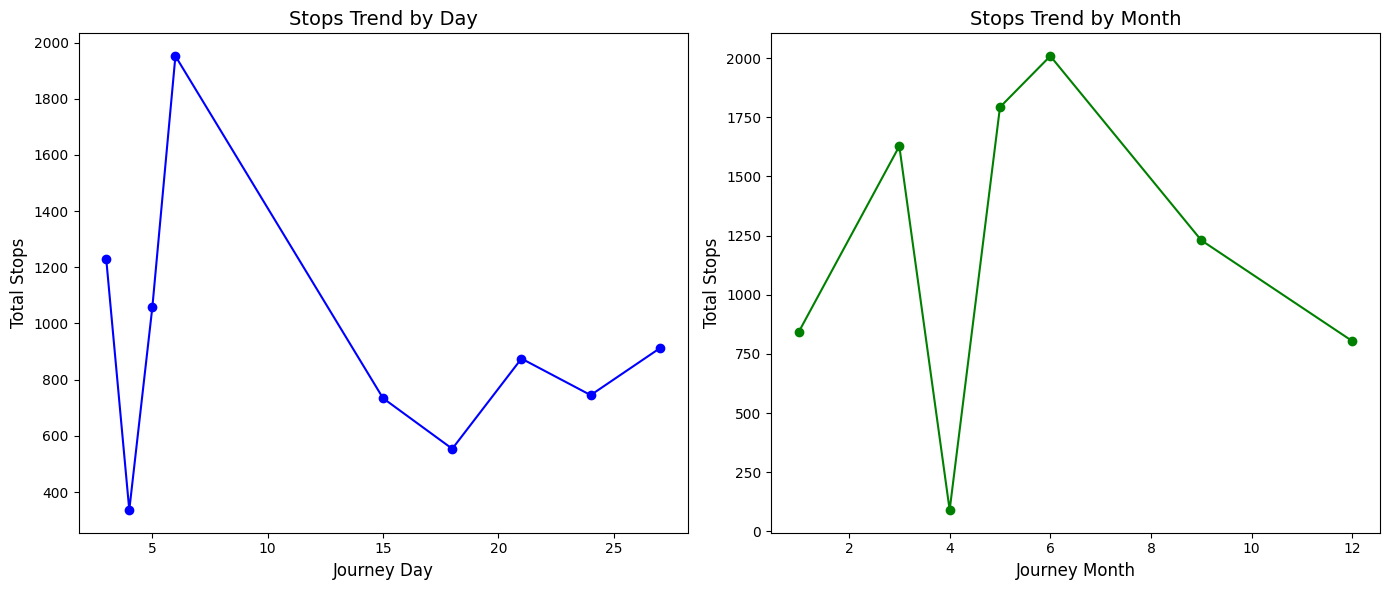

In [1778]:
plt.figure(figsize=(14, 6))

# Line Chart for Days
plt.subplot(1, 2, 1)
plt.plot(day_stops.index, day_stops.values, marker='o', linestyle='-', color='blue')
plt.title('Stops Trend by Day', fontsize=14)
plt.xlabel('Journey Day', fontsize=12)
plt.ylabel('Total Stops', fontsize=12)

# Line Chart for Months
plt.subplot(1, 2, 2)
plt.plot(month_stops.index, month_stops.values, marker='o', linestyle='-', color='green')
plt.title('Stops Trend by Month', fontsize=14)
plt.xlabel('Journey Month', fontsize=12)
plt.ylabel('Total Stops', fontsize=12)

plt.tight_layout()
plt.show()

# 5th Insights: On what Month have Maximum Flights Take off ?

In [1779]:
# Group by Month and Count Flights
month_flights=df.groupby(df['Month_of_Journey'])['Airline'].count()
#Find Month with Maximum Flights
max_month = month_flights.idxmax()
print(f"The month with the maximum flights is: {max_month}")

The month with the maximum flights is: 6


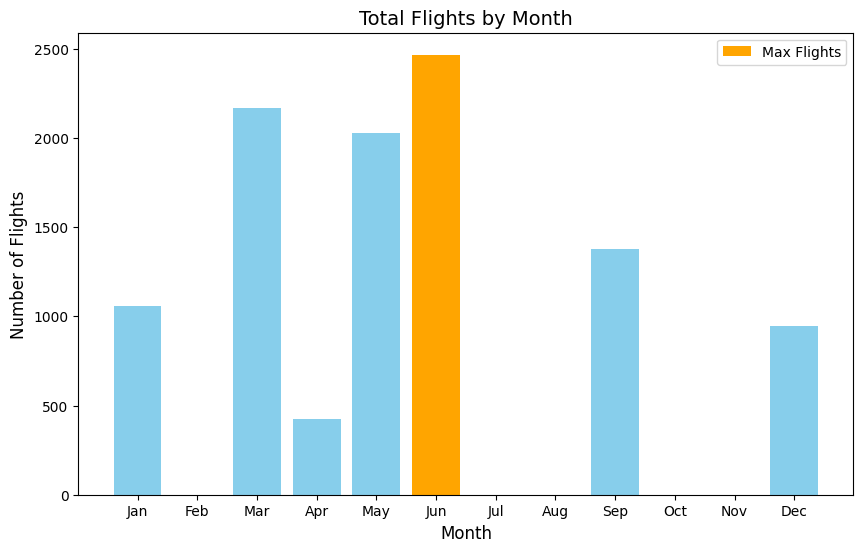

In [1780]:
plt.figure(figsize=(10, 6))
plt.bar(month_flights.index, month_flights.values, color='skyblue')
plt.title('Total Flights by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)

# Highlight Maximum Month
plt.bar(max_month, month_flights[max_month], color='orange', label='Max Flights')
plt.legend()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [1781]:
month_flights[max_month]

np.int64(2466)


# 6th Insights: What Month has The Maximum Earning

In [1782]:
month_earning=df.groupby(df['Month_of_Journey'])['Price'].sum()
month_earning

,Price
Month_of_Journey,
1,1.106361e+07
3,1.827581e+07
4,2.217885e+06
5,1.874661e+07
6,2.253336e+07
9,1.302752e+07
12,8.590002e+06


In [1783]:
max_earning_month = month_earning.idxmax()
max_earning_amount = month_earning.max()
print(f"The month with the maximum earnings is: {max_earning_month} with earnings of {max_earning_amount}")

The month with the maximum earnings is: 6 with earnings of 22533358.0


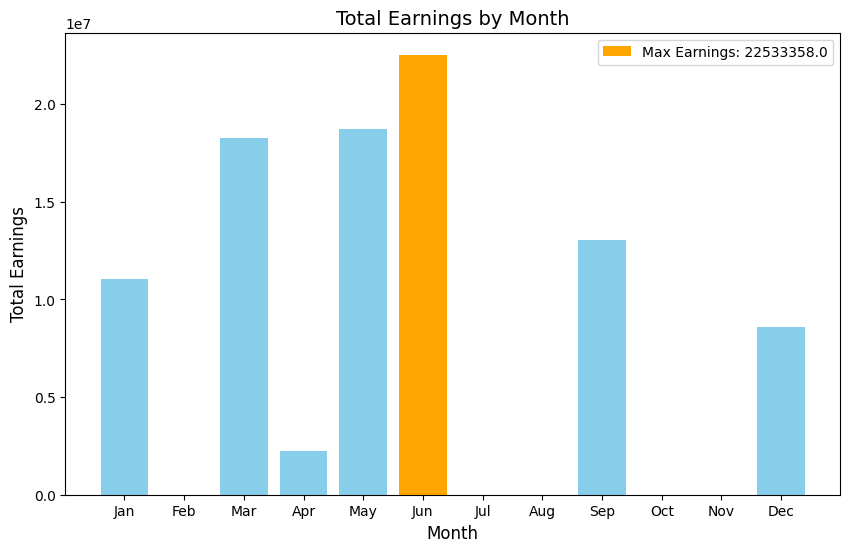

In [1784]:
plt.figure(figsize=(10, 6))
plt.bar(month_earning.index, month_earning.values, color='skyblue')
plt.title('Total Earnings by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Earnings', fontsize=12)

# Highlight Maximum Month
plt.bar(max_earning_month, month_earning[max_earning_month], color='orange', label=f'Max Earnings: {max_earning_amount}')
plt.legend()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [1785]:
month_earning.index,month_earning.values

(Index([1, 3, 4, 5, 6, 9, 12], dtype='int32', name='Month_of_Journey'),
 array([11063606.        , 18275807.        ,  2217885.        ,
        18746608.64245436, 22533358.        , 13027520.        ,
         8590002.        ]))

In [1786]:
max_earning_month, month_earning[max_earning_month]

(np.int32(6), np.float64(22533358.0))

In [1787]:
available_flights=df.groupby(['Source','Destination',])['Airline'].value_counts()

In [1788]:
available_flights

Source    Destination  Airline    
Banglore  Banglore     Jet Airways    192
                       IndiGo         136
                       Air India       67
                       Vistara         46
                       SpiceJet        36
                                     ... 
Mumbai    Hyderabad    Trujet           1
          Kolkata      Jet Airways      7
                       IndiGo           4
                       SpiceJet         3
                       Air India        1
Name: count, Length: 165, dtype: int64